<a href="https://colab.research.google.com/github/Colossus08/ML-Assignment-2/blob/main/ML_Assignment_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [66]:
from google.colab import drive
drive.mount('/content/drive',force_remount=True)

Mounted at /content/drive


In [ ]:
#!unzip /content/drive/MyDrive/ML_A-2/Image_classification_data.zip

In [31]:
#!unzip /content/Image_classification_data.zip

unzip:  cannot find or open /content/Image_classification_data.zip, /content/Image_classification_data.zip.zip or /content/Image_classification_data.zip.ZIP.


In [32]:
import pandas as pd
import tensorflow as tf
from tensorflow import keras

In [33]:
df=pd.read_csv('/content/data_labels_mainData.csv')

In [34]:
df.head()

,InstanceID,patientID,ImageName,cellTypeName,cellType,isCancerous
0,22405,1,22405.png,fibroblast,0,0
1,22406,1,22406.png,fibroblast,0,0
2,22407,1,22407.png,fibroblast,0,0
3,22408,1,22408.png,fibroblast,0,0
4,22409,1,22409.png,fibroblast,0,0


In [35]:
df.columns

Index(['InstanceID', 'patientID', 'ImageName', 'cellTypeName', 'cellType',
       'isCancerous'],
      dtype='object')

In [36]:
df.value_counts('cellTypeName')

,count
cellTypeName,
epithelial,4079
inflammatory,2543
fibroblast,1888
others,1386


In [37]:
len(df.value_counts('patientID'))

60

In [38]:
df.value_counts('cellType')

,count
cellType,
2,4079
1,2543
0,1888
3,1386


## Multiclass Classification

In [39]:
from sklearn.model_selection import train_test_split
train_df,val_df=train_test_split(df[['ImageName','cellTypeName']],test_size=0.2,stratify=df['cellType'],random_state=42)

In [40]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator


training_datagen=ImageDataGenerator(rescale=1./255,data_format='channels_last')
validation_datagen=ImageDataGenerator(rescale=1./255,data_format='channels_last')

In [41]:
batch_size=32

In [42]:
training_generator=training_datagen.flow_from_dataframe(
    dataframe=train_df,
    directory='/content/patch_images/',
    x_col='ImageName',
    y_col='cellTypeName',
    target_size=(27,27),
    batch_size=batch_size,
    class_mode='sparse'
)


validation_generator=validation_datagen.flow_from_dataframe(
    dataframe=val_df,
    directory='/content/patch_images/',
    x_col='ImageName',
    y_col='cellTypeName',
    target_size=(27,27),
    batch_size=batch_size,
    class_mode='sparse'
)

Found 7916 validated image filenames belonging to 4 classes.
Found 1980 validated image filenames belonging to 4 classes.


In [43]:
reg_lambda = 0.001
OUTPUT_CLASSES = 4

model=tf.keras.Sequential([
    tf.keras.layers.Input(shape=(27,27,3)),
    # tf.keras.layers.Lambda(lambda x: tf.expand_dims(x[:,:,:,0],-1,name=None)),
    tf.keras.layers.Conv2D(32,(3,3),activation='relu',kernel_regularizer=tf.keras.regularizers.l2(reg_lambda)),
    tf.keras.layers.MaxPooling2D(pool_size=(2,2)),

    tf.keras.layers.Conv2D(64,(3,3),activation='relu',kernel_regularizer=tf.keras.regularizers.l2(reg_lambda)),
    tf.keras.layers.MaxPooling2D(pool_size=(2,2)),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64),
    tf.keras.layers.Activation('relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(OUTPUT_CLASSES,activation='softmax',kernel_regularizer=tf.keras.regularizers.l2(reg_lambda))
])

In [44]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['sparse_categorical_accuracy'])

In [45]:
history=model.fit(training_generator,epochs=30,validation_data=validation_generator)

Epoch 1/30


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


248/248 ━━━━━━━━━━━━━━━━━━━━ 11s 24ms/step - loss: 1.2495 - sparse_categorical_accuracy: 0.4642 - val_loss: 0.8904 - val_sparse_categorical_accuracy: 0.7045
Epoch 2/30
248/248 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - loss: 0.9098 - sparse_categorical_accuracy: 0.6665 - val_loss: 0.7843 - val_sparse_categorical_accuracy: 0.7152
Epoch 3/30
248/248 ━━━━━━━━━━━━━━━━━━━━ 4s 16ms/step - loss: 0.8348 - sparse_categorical_accuracy: 0.6915 - val_loss: 0.7783 - val_sparse_categorical_accuracy: 0.7096
Epoch 4/30
248/248 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - loss: 0.8013 - sparse_categorical_accuracy: 0.7011 - val_loss: 0.7474 - val_sparse_categorical_accuracy: 0.7167
Epoch 5/30
248/248 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - loss: 0.7727 - sparse_categorical_accuracy: 0.7133 - val_loss: 0.7327 - val_sparse_categorical_accuracy: 0.7303
Epoch 6/30
248/248 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - loss: 0.8072 - sparse_categorical_accuracy: 0.7018 - val_loss: 0.6878 - val_sparse_categorical_accuracy: 0.7455
Epoch 7/

In [46]:
import matplotlib.pyplot as plt

In [47]:
history.history.keys()

dict_keys(['loss', 'sparse_categorical_accuracy', 'val_loss', 'val_sparse_categorical_accuracy'])

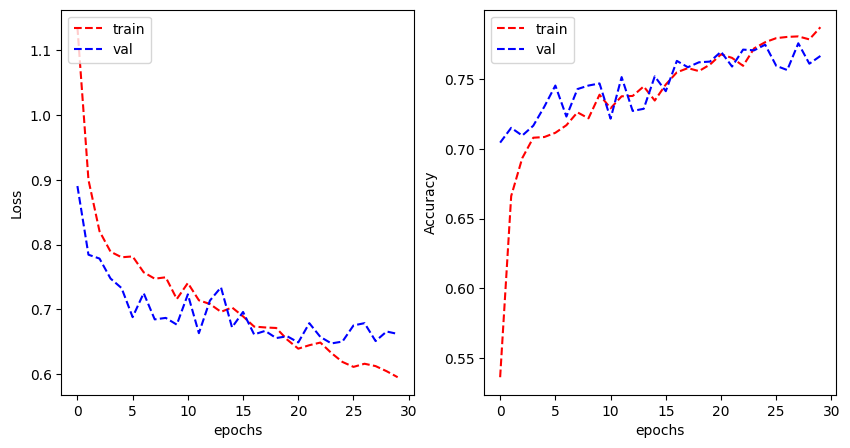

In [48]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.plot(history.history['loss'], 'r--')
plt.plot(history.history['val_loss'], 'b--')
plt.xlabel("epochs")
plt.ylabel("Loss")
plt.legend(['train', 'val'], loc='upper left')

plt.subplot(1,2,2)
plt.plot(history.history['sparse_categorical_accuracy'], 'r--')
plt.plot(history.history['val_sparse_categorical_accuracy'], 'b--')
plt.xlabel("epochs")
plt.ylabel("Accuracy")
plt.legend(['train', 'val'], loc='upper left')
plt.show()

## Binary Classification

In [49]:
from sklearn.model_selection import train_test_split
bin_train_df,bin_val_df=train_test_split(df[['ImageName','isCancerous']],test_size=0.2,stratify=df['isCancerous'],random_state=42)

In [50]:
bin_train_df['isCancerous']=bin_train_df['isCancerous'].astype(str)
bin_val_df['isCancerous']=bin_val_df['isCancerous'].astype(str)

In [51]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator


bin_training_datagen=ImageDataGenerator(rescale=1./255,data_format='channels_last')
bin_validation_datagen=ImageDataGenerator(rescale=1./255,data_format='channels_last')

In [52]:
bin_batch_size=32

In [53]:
bin_training_generator=bin_training_datagen.flow_from_dataframe(
    dataframe=bin_train_df,
    directory='/content/patch_images/',
    x_col='ImageName',
    y_col='isCancerous',
    target_size=(27,27),
    batch_size=bin_batch_size,
    class_mode='binary'
)


bin_validation_generator=bin_validation_datagen.flow_from_dataframe(
    dataframe=bin_val_df,
    directory='/content/patch_images/',
    x_col='ImageName',
    y_col='isCancerous',
    target_size=(27,27),
    batch_size=bin_batch_size,
    class_mode='binary'
)


Found 7916 validated image filenames belonging to 2 classes.
Found 1980 validated image filenames belonging to 2 classes.


In [54]:
reg_lambda = 0.001

bin_model=tf.keras.Sequential([
    tf.keras.layers.Input(shape=(27,27,3)),
    # tf.keras.layers.Lambda(lambda x: tf.expand_dims(x[:,:,:,0],-1,name=None)),
    tf.keras.layers.Conv2D(32,(3,3),activation='relu',kernel_regularizer=tf.keras.regularizers.l2(reg_lambda)),
    tf.keras.layers.MaxPooling2D(pool_size=(2,2)),

    tf.keras.layers.Conv2D(64,(3,3),activation='relu',kernel_regularizer=tf.keras.regularizers.l2(reg_lambda)),
    tf.keras.layers.MaxPooling2D(pool_size=(2,2)),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64),
    tf.keras.layers.Activation('relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(1,activation='sigmoid',kernel_regularizer=tf.keras.regularizers.l2(reg_lambda))
])

In [55]:
bin_model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [56]:
bin_history=bin_model.fit(bin_training_generator,epochs=30,validation_data=bin_validation_generator)

Epoch 1/30


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


248/248 ━━━━━━━━━━━━━━━━━━━━ 9s 21ms/step - accuracy: 0.7031 - loss: 0.5848 - val_accuracy: 0.7884 - val_loss: 0.4801
Epoch 2/30
248/248 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - accuracy: 0.8627 - loss: 0.3490 - val_accuracy: 0.8864 - val_loss: 0.3083
Epoch 3/30
248/248 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - accuracy: 0.8652 - loss: 0.3547 - val_accuracy: 0.8222 - val_loss: 0.3993
Epoch 4/30
248/248 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - accuracy: 0.8616 - loss: 0.3443 - val_accuracy: 0.8929 - val_loss: 0.2853
Epoch 5/30
248/248 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - accuracy: 0.8777 - loss: 0.3079 - val_accuracy: 0.8929 - val_loss: 0.2910
Epoch 6/30
248/248 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - accuracy: 0.8781 - loss: 0.3119 - val_accuracy: 0.8631 - val_loss: 0.3513
Epoch 7/30
248/248 ━━━━━━━━━━━━━━━━━━━━ 6s 16ms/step - accuracy: 0.8846 - loss: 0.3112 - val_accuracy: 0.7823 - val_loss: 0.4484
Epoch 8/30
248/248 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - accuracy: 0.8718 - loss: 0.3222 - val_accuracy: 0.903

In [57]:
import matplotlib.pyplot as plt

In [58]:
bin_history.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

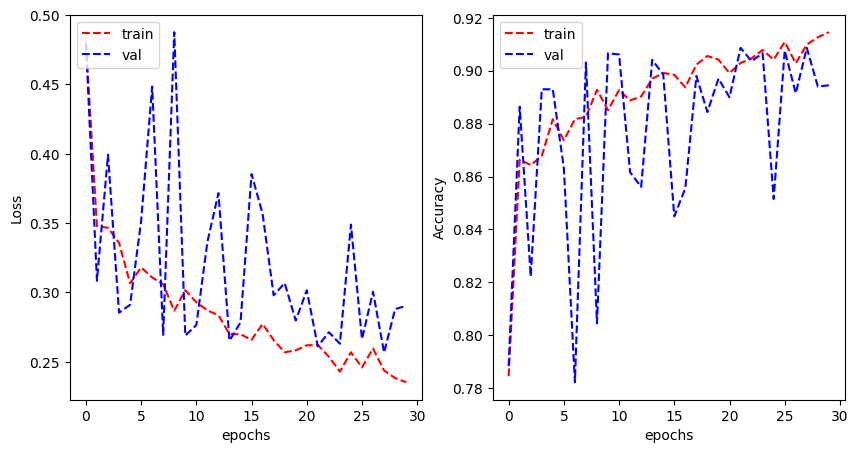

In [59]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.plot(bin_history.history['loss'], 'r--')
plt.plot(bin_history.history['val_loss'], 'b--')
plt.xlabel("epochs")
plt.ylabel("Loss")
plt.legend(['train', 'val'], loc='upper left')

plt.subplot(1,2,2)
plt.plot(bin_history.history['accuracy'], 'r--')
plt.plot(bin_history.history['val_accuracy'], 'b--')
plt.xlabel("epochs")
plt.ylabel("Accuracy")
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [60]:
reg_lambda = 0.001

bin_model=tf.keras.Sequential([
    tf.keras.layers.Input(shape=(27,27,3)),
    # tf.keras.layers.Lambda(lambda x: tf.expand_dims(x[:,:,:,0],-1,name=None)),
    tf.keras.layers.Conv2D(32,(3,3),activation='relu',kernel_regularizer=tf.keras.regularizers.l2(reg_lambda)),
    tf.keras.layers.MaxPooling2D(pool_size=(2,2)),

    tf.keras.layers.Conv2D(64,(3,3),activation='relu',kernel_regularizer=tf.keras.regularizers.l2(reg_lambda)),
    tf.keras.layers.MaxPooling2D(pool_size=(2,2)),

    tf.keras.layers.GlobalAveragePooling2D(),
    tf.keras.layers.Dense(64),
    tf.keras.layers.Activation('relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(1,activation='sigmoid',kernel_regularizer=tf.keras.regularizers.l2(reg_lambda))
])

In [61]:
bin_model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [62]:
bin_history=bin_model.fit(bin_training_generator,epochs=30,validation_data=bin_validation_generator)

Epoch 1/30
248/248 ━━━━━━━━━━━━━━━━━━━━ 9s 21ms/step - accuracy: 0.6086 - loss: 0.6836 - val_accuracy: 0.7818 - val_loss: 0.4704
Epoch 2/30
248/248 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - accuracy: 0.7782 - loss: 0.4838 - val_accuracy: 0.8318 - val_loss: 0.4163
Epoch 3/30
248/248 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - accuracy: 0.8346 - loss: 0.4058 - val_accuracy: 0.8616 - val_loss: 0.3499
Epoch 4/30
248/248 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - accuracy: 0.8484 - loss: 0.3739 - val_accuracy: 0.8652 - val_loss: 0.3373
Epoch 5/30
248/248 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - accuracy: 0.8653 - loss: 0.3606 - val_accuracy: 0.8682 - val_loss: 0.3430
Epoch 6/30
248/248 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - accuracy: 0.8549 - loss: 0.3653 - val_accuracy: 0.8551 - val_loss: 0.3578
Epoch 7/30
248/248 ━━━━━━━━━━━━━━━━━━━━ 4s 16ms/step - accuracy: 0.8561 - loss: 0.3569 - val_accuracy: 0.8697 - val_loss: 0.3289
Epoch 8/30
248/248 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - accuracy: 0.8645 - loss: 0.3549 - val_accu

In [63]:
import matplotlib.pyplot as plt

In [64]:
bin_history.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

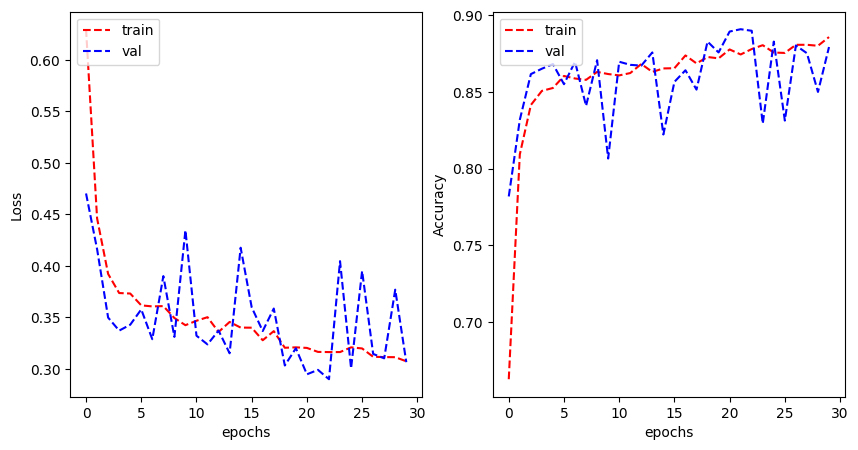

In [65]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.plot(bin_history.history['loss'], 'r--')
plt.plot(bin_history.history['val_loss'], 'b--')
plt.xlabel("epochs")
plt.ylabel("Loss")
plt.legend(['train', 'val'], loc='upper left')

plt.subplot(1,2,2)
plt.plot(bin_history.history['accuracy'], 'r--')
plt.plot(bin_history.history['val_accuracy'], 'b--')
plt.xlabel("epochs")
plt.ylabel("Accuracy")
plt.legend(['train', 'val'], loc='upper left')
plt.show()

# Performance Metrics Selection


The selection of appropriate performance metrics is essential for evaluating the effectiveness of the machine learning models, most especially in domains like medical image analysis where class imbalance is common and the cost of misclassification can be dire. Going beyond basic evaluation metrics provides a more varied understanding of the model's strengths and weaknesses.


---



**Binary Classification Metrics (isCancerous)**
1. ***Accuracy*** - is the proportion of total predictions that were correct. This provides a general overview of the model's performance. However, it can be misleading in imbalanced datasets where a model might achieve high accuracy by simply predicting the majority class.

$$
\frac{TP + TN}{TP + TN + FP + FN}
$$


2. ***Precision*** - is the proportion of instances predicted as positive, which were actually positive. This is important for understanding the rate of false alarms. In the context of medical image analysis, high precision means that when the model predicts cancer, it is likely correct, minimising false positives. False positives should be avoided as it can lead to patient distress or unneccessary procedures.

$$
\frac{TP}{TP + FP}
$$


3. ***Recall*** - is the proportion of actual positive instances that were correctly identified by the model. This is often the most important metric in cancer detection (Boesch, 2025). High recall makes sure that the model identifies as many actual cancer cases as possible, minimising the number of missed diagnoses, which, as mentioned above, could bring severe consequences.

$$
\frac{TP}{TP + FN}
$$


4. ***F1-Score*** - calculates the average of precision and recall. It provides a single score that balances. It is particularly useful when both false positives and false negatives are important, and especially valuable when dealing with class imbalance where accuracy by itself is not enough.

$$
\frac{Precision × Recall}{Precision + Recall} × 2
$$


5. ***Specificity*** - the proportion of actual negative instances that were correctly identified. This complements recall. High specificity illustrates the model's ability to correctly identify non-cancerous cases, further helping minimise false alarms among healthy individuals.

$$
\frac{TN}{TN + FP}
$$


6. ***AUC-ROC (Area Under the Receiver Operating Characteristic Curve)*** - is the area under the curve plotting recall against the false positive rate at various classification thresholds. This measures the model's ability to distinguish between the positiuve and negative classes across all thresholds. An AUC close to 1 indicates excellent discriminative ability, while 0.5 suggests performance no better than random guessing. It does not rely on a fixed threshold and offers a reliable measure of how well the model distinguishes between classes, making it especially useful for comparing models and handling imbalanced datasets.



---


**Multiclass Classifcation (cellTypeName)**
1. Accuracy